# Midsemester Project : Twitter Analysis
### About this project
This is your mid-semester project.The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. Moreoover, Trump tweets has become so consequential, they actually can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we could pick either candiadate (Hillary Clinton or Donald Trump) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret w/o any bias.


## Set up
Let us get all the libaries initialized as necessary

In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets
It is important to download the most recent tweets (especially if you are working as a group). Those who are working by themselves are allowed to use the downloaded files w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

## PART 2 - Working with Twitter
The json file in data folder contains (to be downloaded by you) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [2]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [3]:
dest_path = 'data/2017-2018.json'
trump_tweets = load_tweets(dest_path)

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [4]:
assert 2000 <= len(trump_tweets) <= 4000

### Task 2.3

Find the number of the month of the oldest tweet.

In [4]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)

### BEGIN SOLUTION
data = pd.read_json("data/2017-2018.json") 
oldest_month = pd.to_datetime(data["created_at"])
print(oldest_month.min())


2017-10-19 11:56:15


## PART 3  Twitter Source Analysis



### Task 3.1

Create a new date frame from `2016-2017.json` and merge with `trump_tweets` 

**Important:** There may/will be some overlap so be sure to eliminate duplicate tweets. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. 

**Hint:** the `id` of a tweet is always unique.

In [14]:
data1 = pd.read_json("data/2016-2017.json")
type(data1.index)

pandas.core.indexes.range.RangeIndex

In [15]:
data1.index.astype('int64',copy=False)

RangeIndex(start=0, stop=6830, step=1)

In [17]:
data.index.astype('int64',copy=False)

RangeIndex(start=0, stop=3214, step=1)

In [18]:
### BEGIN SOLUTION

data.rename(columns ={'full_text':'text'}, inplace = True)
df1 = data[['created_at','favorite_count','id','in_reply_to_user_id_str','retweet_count','source','text']]
df2 = data1[['created_at','favorite_count','id','in_reply_to_user_id_str','retweet_count','source','text']]
all_tweets = pd.concat([df1,df2]).drop_duplicates('text')

len(all_tweets)
### END SOLUTION
# assert(len(all_tweets) == 9455) 

9455

### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Warning:** *Don't forget to check the type of index*

In [7]:
### BEGIN SOLUTION
df_trump = all_tweets[['id','created_at','source','text','retweet_count']].set_index('id')
df_trump.rename(columns = {'created_at':'time'}, inplace=True) 
df_trump['time']= pd.to_datetime(df_trump['time'],utc=True)
df_trump.size   #37820
df_trump.sort_index(ascending=True, inplace=True)
df_trump.index.dtype #dtype('int64')
df_trump

### END SOLUTION

,time,source,text,retweet_count
id,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460
682792967736848384,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434
682805320217980928,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721
683037464504745984,2016-01-01 21:29:56+00:00,Twitter for Android,"""@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win - go Donald Trump""",933
683060169677344768,2016-01-01 23:00:09+00:00,Twitter for Android,"Well, the year has officially begun. I have many stops planned and will be working very hard to win so that we can turn our country around!",2642
683060654098530304,2016-01-01 23:02:05+00:00,Twitter for Android,"""@marie7777777777: @realDonaldTrump we love u to Trump Family. God bless you.""",654
683061678246903808,2016-01-01 23:06:09+00:00,Twitter for Android,"""@JodiL792: We are Standing with you! Spreading the Word...Trump for President 2016!! I wake &amp; sleep praying for you &amp; the USA!+Israel2""",893


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [8]:
df_trump['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [9]:
### BEGIN SOLUTION
df_trump['source'] = df_trump['source'].str.replace(r'<.*?>', '')
df_trump['source']
### END SOLUTION

id
682723973449289728     Twitter for Android
682764544402440192      Twitter for iPhone
682792967736848384      Twitter for iPhone
682805320217980928      Twitter for iPhone
682805477168779264     Twitter for Android
683037464504745984     Twitter for Android
683060169677344768     Twitter for Android
683060654098530304     Twitter for Android
683061678246903808     Twitter for Android
683062220490715136     Twitter for Android
683062751434899456     Twitter for Android
683066224251645952     Twitter for Android
683066650627846144     Twitter for Android
683070410993364992     Twitter for Android
683127297457700864     Twitter for Android
683128636279361536      Twitter for iPhone
683140004625936384      Twitter for iPhone
683259029804695552     Twitter for Android
683260753810440192     Twitter for Android
683277309969694720     Twitter for Android
683377290282156032     Twitter for Android
683378470093746176     Twitter for Android
683392613869858816     Twitter for Android
68339422

### Make a plot to find out the most common device types used in accessing twitter

Text(0, 0.5, 'Number of Tweets')

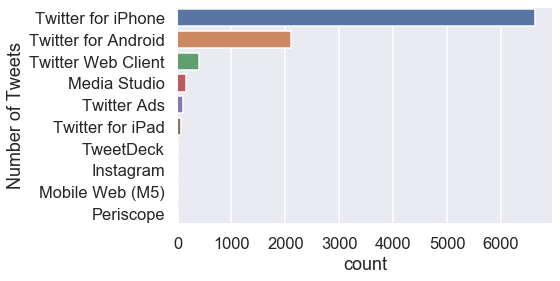

In [10]:
### BEGIN SOLUTION
ax = sns.countplot(data = df_trump, y = 'source',order = df_trump['source'].value_counts(ascending = False).index)
ax.set_ylabel("Number of Tweets")

### END SOLUTION

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

In [11]:
df_trump['time'][0:3]

id
682723973449289728   2016-01-01 00:44:14+00:00
682764544402440192   2016-01-01 03:25:27+00:00
682792967736848384   2016-01-01 05:18:23+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [12]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,2015-12-31 19:44:14-05:00
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,2015-12-31 22:25:27-05:00
682792967736848384,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,2016-01-01 00:18:23-05:00
682805320217980928,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,2016-01-01 01:07:28-05:00
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,2016-01-01 01:08:06-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$


Text(0.5, 1.0, 'The hour of the day that Trump use Twitter')

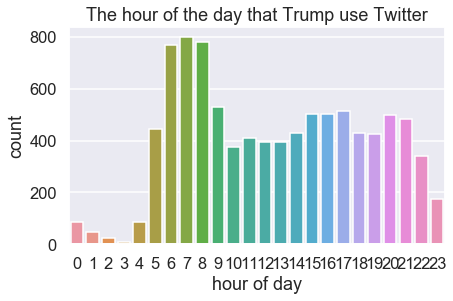

In [13]:
df_trump['hour']= df_trump['est_time'].dt.hour + df_trump['est_time'].dt.minute/60 + df_trump['est_time'].dt.second/(60*60)

hours = df_trump['est_time'].dt.hour.to_frame()
hours

bx = sns.countplot(data = hours, x = 'est_time')
bx.set_xlabel("hour of day")
bx.set_title("The hour of the day that Trump use Twitter")

In [14]:
assert np.isclose(df_trump.loc[690171032150237184]['hour'], 8.93639)


Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 



Text(0, 0.5, 'Fraction')

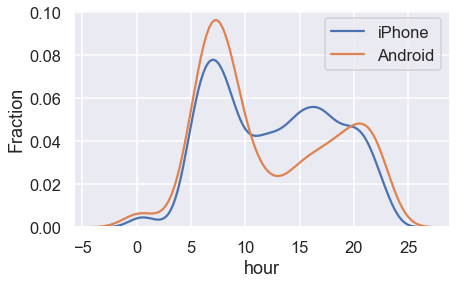

In [15]:

iPhone = df_trump[df_trump['source']== 'Twitter for iPhone']
Android = df_trump[df_trump["source"]== 'Twitter for Android']

ax = sns.distplot(iPhone['hour'].astype(int),kde=True,hist=False,label ='iPhone')
ax = sns.distplot(Android['hour'].astype(int),kde=True,hist=False, label = 'Android')
ax.set_ylabel('Fraction')


### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

Text(0, 0.5, 'Fraction')

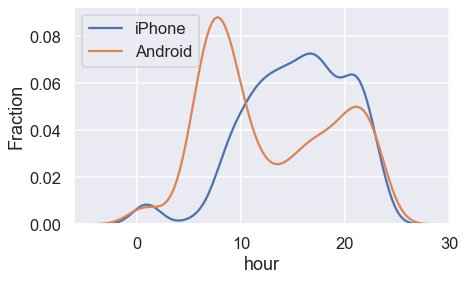

In [16]:
### BEGIN SOLUTION
df_trump['years'] = df_trump['est_time'].dt.year 
iPhone_2016 = df_trump[(df_trump['years']==int(2016))& (df_trump['source'] == 'Twitter for iPhone')&(df_trump['hour'])]
Android_2016 = df_trump[(df_trump['years']==int(2016))& (df_trump['source'] == 'Twitter for Android')&(df_trump['hour'])]

# code to plot

ax = sns.distplot(iPhone_2016['hour'],kde=True,hist=False, label = 'iPhone')
ax = sns.distplot(Android_2016['hour'],kde=True, hist=False, label = 'Android')
ax.set_ylabel('Fraction')
### END SOLUTION

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

* What time of the day the Android tweets were made by paid staff?


Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [17]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump


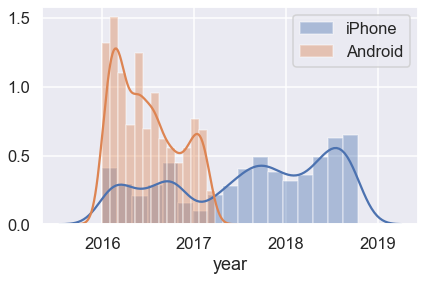

In [18]:
### BEGIN SOLUTION

Ap = df_trump[(df_trump['source']=='Twitter for iPhone') & (df_trump['year'])]
An = df_trump[(df_trump['source']=='Twitter for Android') & (df_trump['year'])]
ax = sns.distplot(Ap['year'], kde= True, hist=True,label = 'iPhone')
ax = sns.distplot(An['year'], kde = True,hist=True, label='Android')
ax.legend()
### END SOLUTION

## PART 4 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [19]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [20]:
### BEGIN SOLUTION
ds = pd.read_csv('data/vader_lexicon.txt',sep='\t',header=None)

ds.columns = ['token','polarity','value','content']
df_sent = ds.set_index('token')
df_sent

### END SOLUTION

,polarity,value,content
token,,,
$:,-1.5,0.80623,"[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]"
%),-0.4,1.01980,"[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]"
%-),-1.5,1.43178,"[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]"
&-:,-0.4,1.42829,"[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]"
&:,-0.7,0.64031,"[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]"
( '}{' ),1.6,0.66332,"[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]"
(%,-0.9,0.94340,"[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]"
('-:,2.2,1.16619,"[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]"
(':,2.3,0.90000,"[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]"


### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [21]:
df_trump['text'] = df_trump['text'].str.lower()
df_trump['text']

id
682723973449289728                                                                                                                                                      i will be on @foxnews live,  with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!
682764544402440192                                                                                                                                                                                                             happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv
682792967736848384                                                                                                                                                                                                                                               #happynewyearamerica! https://t.co/eeqb8pdrue
682805320217980928                                                                      

### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [22]:
punct_re = r'[^\w\s\\n]'

df_trump['no_punc']= df_trump['text'].str.replace(punct_re, ' ')

df_trump['no_punc']

id
682723973449289728                                                                                                                                                      i will be on  foxnews live   with members of my family  at 11 50 p m  we will ring in the new year together  make america great again 
682764544402440192                                                                                                                                                                                                             happy new year  amp  thank you  https   t co yo1yi8qbzy https   t co uxuxwj1rbv
682792967736848384                                                                                                                                                                                                                                                happynewyearamerica  https   t co eeqb8pdrue
682805320217980928                                                                      

In [23]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.


In [24]:
df = df_trump['no_punc'].str.split(expand=True)
df = df.stack().reset_index()
df.rename(columns={int(0):'word', 'level_1':'num'}, inplace = True)
tidy_format = df.set_index('id')
tidy_format

,num,word
id,,
682723973449289728,0,i
682723973449289728,1,will
682723973449289728,2,be
682723973449289728,3,on
682723973449289728,4,foxnews
682723973449289728,5,live
682723973449289728,6,with
682723973449289728,7,members
682723973449289728,8,of


In [25]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.


In [26]:
# In the case of each tweet has duplicated words
a = tidy_format.groupby('id')['word'].value_counts().to_frame()
a.rename(columns = {"word":"count"}, inplace = True)
temp = a.reset_index().merge(df_sent,how = 'left', left_on = 'word',right_on = df_sent.index).set_index('id')
# Get the duplicated word total sentiments
temp['polarity'] = temp['count'] * temp["polarity"]
#Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.
b = temp.groupby('id')['polarity'].sum().to_frame()
df_trump = df_trump.merge(b, how = 'inner', left_index = True, right_index = True)


dtype('int64')

In [27]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
# assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)

### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [28]:
# The method below check only one maximum
# df_trump.loc[df_trump['polarity']==df_trump['polarity'].max()].T
i = df_trump["polarity"].idxmax()
print('Most positive tweets:')
df_trump.loc[i, 'text']


Most positive tweets:


'congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!'

In [29]:
j = df_trump["polarity"].idxmin()
print("Most nagative tweets:")
df_trump.loc[j, 'text']

Most nagative tweets:


'it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!'

### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

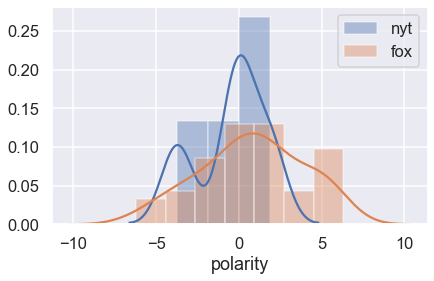

In [30]:
A = tidy_format.merge(df_trump,on ='id')
A_nyt = A[(A['word']=='nyt')& A['polarity'] ]
A_fox= A[(A["word"] == 'fox')]
a = sns.distplot(A_nyt['polarity'], kde = True, label='nyt')
a = sns.distplot(A_fox['polarity'], kde = True, label='fox')
a.legend()

##### Comment on what you observe:

#### BEGIN SOLUTION
According to my plot that Trump mentioned Fox news a lot more often than NewYork Time, and most of time are positive sentiments this is because Fox news had provided many reporting in favor of conservative political positions during president campaign.https://www.vox.com/2019/9/3/20836724/why-trump-is-attacking-fox-news-explained 

#### END SOLUTION

## PART 5 - Principal Component Analysis (PCA) and Twitter
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

In [51]:
import nltk
# nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
### BEGIN SOLUTION
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')+['trump','hillary','http','obama']) # get the stopword  from library
# Need split words before stemming
df_trump["tokened"] = df_trump["no_punc"].apply(nltk.word_tokenize)
# Lemmatization to change word into the common form
df_trump['cleaned'] = df_trump['tokened'].apply(lambda x: [lemmatizer.lemmatize(word)for word in x])
# Remove stop words
df_trump['cleaned']=df_trump['cleaned'].apply(lambda x:[word for word in x if word not in (stop_words)])
# To remove nonsense words in the text
words = set(nltk.corpus.words.words())
df_trump['cleaned'] = df_trump['cleaned'].apply(lambda x: ' '.join([w for w in x if w in words or w.isalpha()]))
df_trump["cleaned"].head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hongpinglin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


id
682723973449289728                  foxnews live member family p ring new year together make america great
682764544402440192                                                          happy new year amp thank co co
682792967736848384                                                                  happynewyearamerica co
682805320217980928                                   happy new year maralago thank great family support co
682805477168779264            jallenaip said wa fog war explanation lie benghazi fog allowed wh vote potus
683037464504745984           sprinklermanus cnn realdonaldtrump spending million still going win go donald
683060169677344768    well year ha officially begun many stop planned working hard win turn country around
683060654098530304                                                 realdonaldtrump love u family god bless
683061678246903808                        standing spreading word president wake amp sleep praying amp usa
683062220490715136     memeoryhead

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating Bag of Words
# Get the 50 most frequent terms
count_vector=CountVectorizer(max_features = 50)  
sparse_matrix=count_vector.fit_transform(df_trump['cleaned']) 
# count_vector.vocabulary_        # For debug
doc_term_matrix=sparse_matrix.todense()
# doc_term_matrix
df_words = pd.DataFrame(doc_term_matrix, columns=count_vector.vocabulary_ )
df_words = df_words.iloc[:5000, :]
## code to plot the first 10 rows of the matrix
df_words.head(10)

,new,year,make,america,great,amp,thank,co,wa,vote,...,job,day,election,republican,american,border,tax,democrat,fake,crooked
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
w_pca = pca.fit_transform(df_words) 
w_pca.shape
pca.components_

array([[ 3.38661661e-02, -3.35840944e-04,  7.17338754e-03, ...,
        -2.58769979e-02, -3.13240722e-02, -1.61142935e-02],
       [ 3.72343571e-01, -1.06627951e-02,  3.20426792e-02, ...,
         1.22675956e-02, -1.54779825e-02, -3.42990724e-03],
       [-1.20811916e-01, -4.95670097e-03,  3.20677111e-01, ...,
         1.36755812e-02, -9.57138124e-03, -8.67044385e-03],
       ...,
       [ 1.29301711e-02, -2.51825826e-02, -3.21745824e-03, ...,
         5.58207452e-03,  3.73919199e-02,  3.04141957e-02],
       [ 1.75167639e-02,  1.11900461e-02, -1.03525011e-02, ...,
         1.30163995e-02, -1.11898505e-03, -1.57108301e-02],
       [-1.22795171e-02, -2.51235300e-03, -4.02054365e-03, ...,
        -8.61224275e-03,  6.69667992e-03, -3.09879093e-03]])

In [54]:
print(pca.explained_variance_)


[0.45106144 0.17864673 0.11223121 0.10746325 0.08621898 0.07916371
 0.07637814 0.06792374 0.06568412 0.06265247 0.0590788  0.05866298
 0.05386745 0.04855553 0.04825713 0.0467821  0.0446685  0.043384
 0.04299129 0.04127709 0.03965128 0.03849642 0.0373667  0.03607541
 0.03584045 0.03462136 0.03411078 0.03315783 0.03254046 0.03196488
 0.03117153 0.03047457 0.02972376 0.02832154 0.02703014 0.02554344
 0.02539015 0.02446564 0.02308891 0.02204813 0.02100415 0.01978254
 0.01820122 0.01796915 0.01766555 0.01738848 0.016548   0.01467116
 0.01262156 0.00644278]


### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

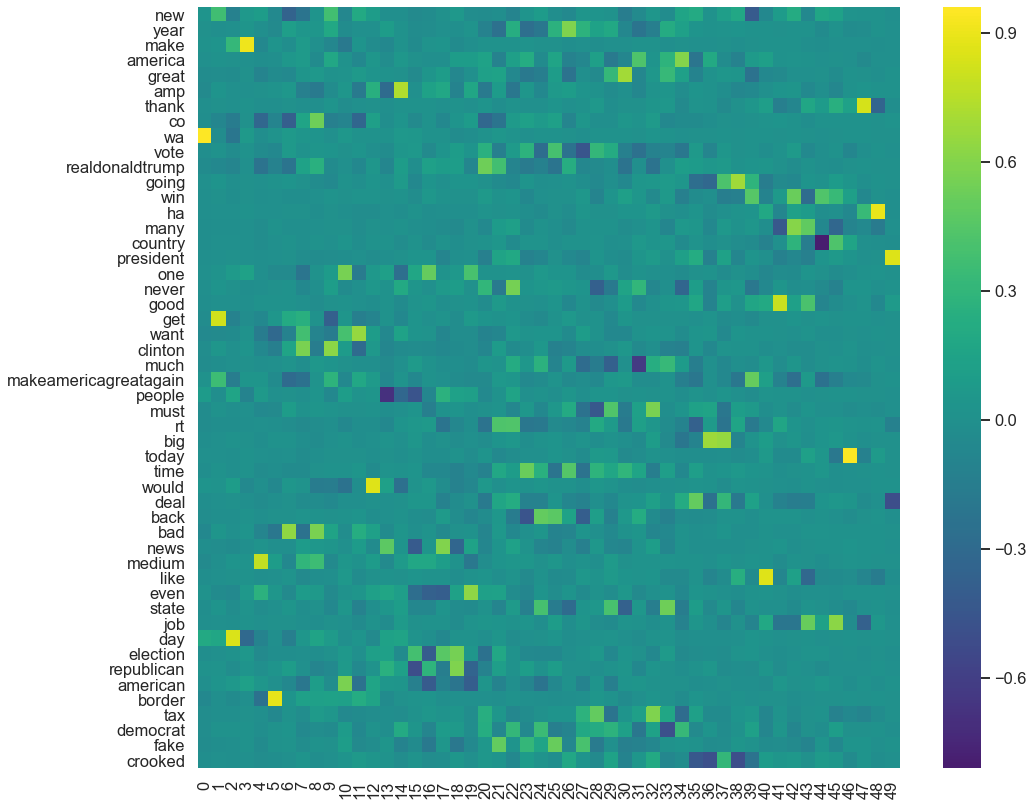

In [55]:
### BEGIN SOLUTION
fig = plt.figure(figsize=(14,14))
map = pd.DataFrame(pca.components_, columns=df_words.columns).T
s=sns.heatmap(map,center=0,cmap='viridis', xticklabels=True, yticklabels=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=0)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

plt.show() 

### END SOLUTION

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. 

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

Text(0, 0.5, 'PC2')

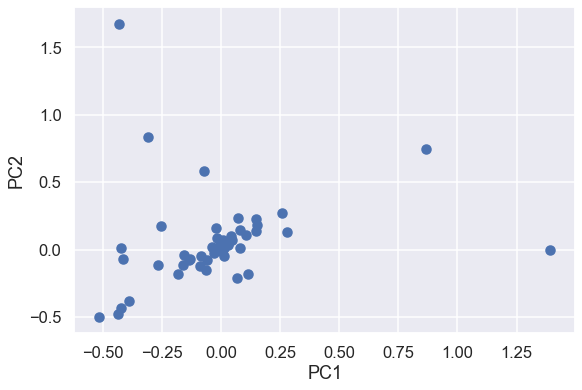

In [56]:
### BEGIN SOLUTION
plt.figure(figsize=(8,6))
plt.scatter(x=w_pca[0, :],y= w_pca[1,:])
plt.xlabel('PC1')
plt.ylabel('PC2')
### END SOLUTION

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~7 pandas commands and get everything done on one line.

In [57]:
# top_20 = ...
### BEGIN SOLUTION

L = df_trump['retweet_count'].to_frame()
R =df_trump['cleaned'].str.split(expand=True)
R = R.stack().reset_index()
df_retweet=L.merge(R, how='left', on='id')
df_retweet.rename(columns={int(0):'word'}, inplace = True)
df_retweet = df_retweet.groupby('word')['retweet_count'].mean().to_frame()
df_retweet = df_retweet.nlargest(20,['retweet_count'])
df_retweet
### END SOLUTION

,retweet_count
word,
fnn,369530.0
wyunhjjujg,369530.0
insult,254000.0
fraudnewscnn,200188.5
starved,180010.0
geclntqizq,168765.0
fat,128058.0
forensic,120661.0
button,113843.4


### Task 6.2
Plot a bar chart of your results:

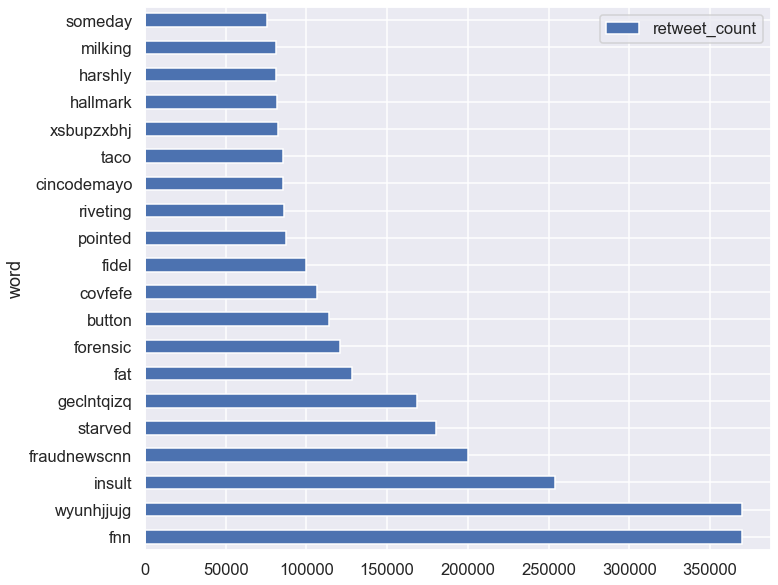

In [58]:
ax = df_retweet.plot.barh(figsize=(10,10))

Created by Andy Guna @2018 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez